# Capstone Mini-Project: Exploratory Data Analysis & Storytelling
- Exploratory Data Analysis of Airbnb Dataset
<br>
- Author: Ashley Jiangyang

# Table of Contents
1. [Introduction and Project Goals](#Intro)
2. [Question of Interest](#Quest) <br>
3. [Exploratory Data Analysis](#EDA)<br>
    3.1 [Yearly Revenue](#Yd)<br>
    3.2 [Host Activeness On The Platform](#Ha)<br>
    3.3 [Listings Accommodate & Facilities](#Laf)<br>
    3.4 [Interavtive Relationshiop](#Ir)<br>
    3.5 [Geographical Information](#Gi)<br>
4. [Summary](#sum)

# 1. Introduction
<a id="Intro"></a> 

> __Background__
<br>
Airbnb is a popular home-sharing platform enabling home-owners ('hosts') all over the world to share their accommodation ('listings') with the guests, guests can book through Airbnb and stay in them. For potential hosts, this could be a profitable option to list their empty vacation homes or spare rooms. And home-owners even turn their properties into Airbnb hosting exclusively to earn money.
As far as we all know, whether an Airbnb listing can attract the customer and gain profits is determined by many factors, it's price, the seasonality, the attribute of the house, and the local marketing, etc.. and if taking the variance of many perspectives, it's even harder to know whether the listing can make profits both in the short-term and the long-term.
<br/><br/>
__Goals__
<br>
This project aims to take advantage of the previously cleaned Airbnb Seattle dataset, to leverage the insights of the Seattle Airbnb marketing as well as answer the key question - for hosts, how to maximize their earning? To perform exploratory data analysis on the tidying data set will reveal what features influence the listings yields. Data visualization, the statistical summary will be applied to the data.
<br/><br/>
> __Motivations__
<br/>
Answering the question would be a benefit for both potential hosts and any home-sharing platform, that info will be very useful guidance to make the investment as well as regulate the listings market. 
<br/><br/>
We will also be exploring related features to be considered in the modeling.
<br/><br/>
Data Source: https://www.kaggle.com/airbnb/seattle#listings.csv
<br>
Reference: http://insideairbnb.com/about.html

# 2. Question of Interest
<a id="Quest"></a> 

> to initial the data storytelling journey, we will organize this notebook around the following questions of interest:
<br>
1. What's the global trend for the host activity over all the data? does it influence the yield?
2. Is there a difference in time for activating the listing on the platform? Does it influence the yield?
3. Does the calculated hosting count influence the yield?
4. How about the rating score? will the group with higher rating scores have a higher yield overall?
5. Previously we extract the top popular amenities, are they related to higher yield? what are top important about influencer among them?
6. How about the geographical location? dose the popular district gain better earning than others?
<br/>

Now let's start to explore the data.

# 3. Exploratory Data Analysis
<a id="EDA"></a> 
<br>
For this section, we will peform the explore the data on the features that we are most interested in.

In [1]:
# Import packages

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   
from scipy import stats
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

In [457]:
# Import the data
listings_eda = pd.read_csv("listings_clean_eda.csv") 

## 3.1 `Yearly Revenue`<a id="Yd"></a> 
What does the Yearly Revenue look like? let's dive into our target feature of interest at first.

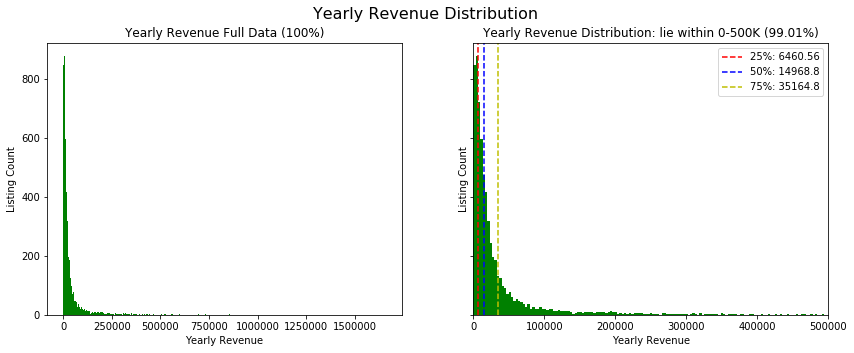

In [371]:
# calculate the percentile
Less_500K_n = len(listings_eda[listings_eda['yearly_revenue'] <= 500000]['yearly_revenue'])
n = len(listings_eda['yearly_revenue'])

p_25 = round(np.percentile(listings_eda['yearly_revenue'], 25), 2)
p_50 = round(np.percentile(listings_eda['yearly_revenue'], 50), 2)
p_75 = round(np.percentile(listings_eda['yearly_revenue'], 75), 2)

# initial plot
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=False, figsize=(14,5))

fig.suptitle('Yearly Revenue Distribution', fontsize=16)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(listings_eda['yearly_revenue'] , bins = 500 , color = 'green' )
axs[1].hist(listings_eda['yearly_revenue'] , bins = 500 , color = 'green' )

# limit the data to show inner struture
axs[1].set_xlim([0, 500000])

# add title and label
axs[0].set_title('Yearly Revenue Full Data (100%)')
axs[0].set_xlabel('Yearly Revenue')
axs[0].set_ylabel('Listing Count')

axs[1].set_title("Yearly Revenue Distribution: lie within 0-500K ({:.2%})".format(Less_500K_n/n))
axs[1].set_xlabel('Yearly Revenue')
axs[1].set_ylabel('Listing Count')
axs[1].axvline(p_25, color = "r", linestyle='--', label='25%: {}'.format(p_25))
axs[1].axvline(p_50, color = "b", linestyle='--', label='50%: {}'.format(p_50))
axs[1].axvline(p_75, color = "y", linestyle='--', label='75%: {}'.format(p_75))

# add legend
legend = axs[1].legend(loc='upper right')

# show plot
plt.show()

In [370]:
# description
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print("Yearly Revenue Statistics: \n{}".format(listings_eda['yearly_revenue'].describe()))
print()

#print("Yearly Revenue Median: {:.2f}".format(np.median(listings_eda['yearly_revenue'])))
# some important values
equal_to_zero_n = len(listings_eda[listings_eda['yearly_revenue'] == 0]['yearly_revenue'])
within_p_50_n = len(listings_eda[listings_eda['yearly_revenue'] <= p_50]['yearly_revenue'])
greater_500K = len(listings_eda[listings_eda['yearly_revenue'] > 500000]['yearly_revenue'])
print("Yearly Revenue Percentile of 0: {:.2%}".format(equal_to_zero_n/n))
print("Yearly Revenue Percentile greater than 500,000: {:.2%}".format(greater_500K/n))
print()
# print extreme value
print("Yearly Revenue values greater than 500,000: \n{}".format(listings_eda[listings_eda['yearly_revenue'] > 500000]['yearly_revenue'].sort_values()))


Yearly Revenue Statistics: 
count      6583.00000
mean      42788.59535
std       92133.01213
min          96.00000
25%        6460.56000
50%       14968.80000
75%       35164.80000
max     1659240.00000
Name: yearly_revenue, dtype: float64

Yearly Revenue Median: 14968.80
Yearly Revenue Percentile of 0: 0.00%
Yearly Revenue Percentile greater than 500,000: 0.99%

Yearly Revenue values greater than 500,000: 
2436    501228.00000
4781    504360.00000
2218    505440.00000
3855    507124.80000
3813    507600.00000
            ...     
2783    960048.00000
2846   1008432.00000
4412   1023660.00000
4108   1391040.00000
1578   1659240.00000
Name: yearly_revenue, Length: 65, dtype: float64


## Yearly Revenue Summary

>Now we have combined both plot and the statistic summary for our target feature `Yearly Revenue`:
<br/>  - It looks like our data is highly right-skewed, we have lots of extreme values, some even up to 2157012,
<br>  - The mean is about 54748 and the 50 percentile is 26973, our mean is shifting towards the right outweighed by these extreme values,
<br>  - 0.03% of the avenue is zero, which means no active booking on the platform if all the scrapped data are trustworthy.


## 3.2 `Host Activeness On The Platform`
<a id="Ha"></a> 
<br> We have checked the `yield` above, now we wonder is the host activeness have something to do with the potential
yield pattern, we will start from several time-related features here.


__Global Trend for Host__

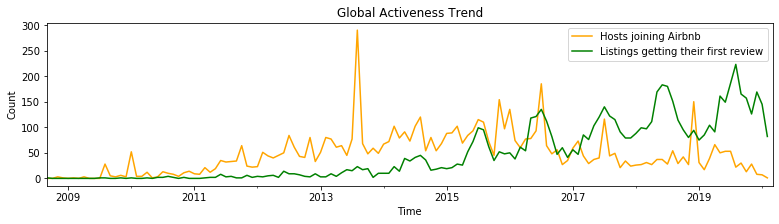

In [372]:
# convert the time features
listings_eda['host_since'] = pd.to_datetime(listings_eda['host_since'], format = '%Y/%m/%d')
listings_eda['first_review'] = pd.to_datetime(listings_eda['first_review'], format = '%Y/%m/%d')

# plot the results
plt.figure(figsize=(13,3))
listings_eda.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
listings_eda.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Global Activeness Trend')
plt.legend()
plt.xlim('2008-09-01', '2020-03-22') # Limiting to minimum and maximum study window
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

>>Let's take a look at the global market for the host. 
- The data shows from the year 2008 to 2020, there is a steady increasing trend for both the hosts joining Airbnb and listing getting their first review over these years;
- There is a small boost around 2013-2014, that may be caused by business event or campaign, or the tourism trend of local Seattle, or it could be Airbnb gain its popularity, more people are putting their properties on the platform;
- we see a zig-zag trend for both curves, showing a mix of seasonality and event effect.
- Steady increasing trend for both join and first review.

__1. Global Trend for Yearly Revenue, price, Occupancy Rate__

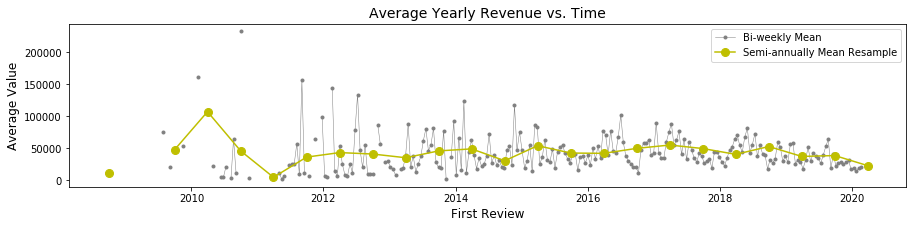

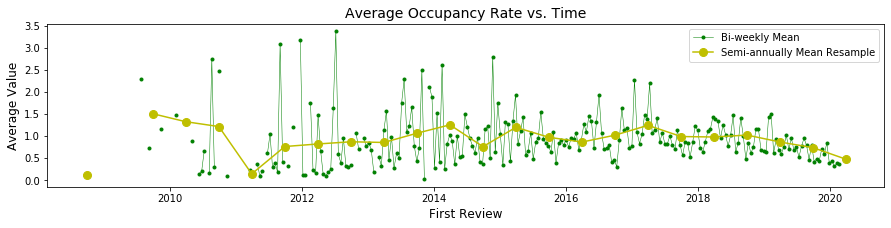

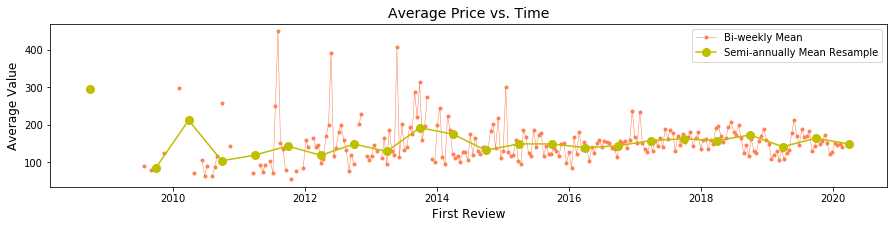

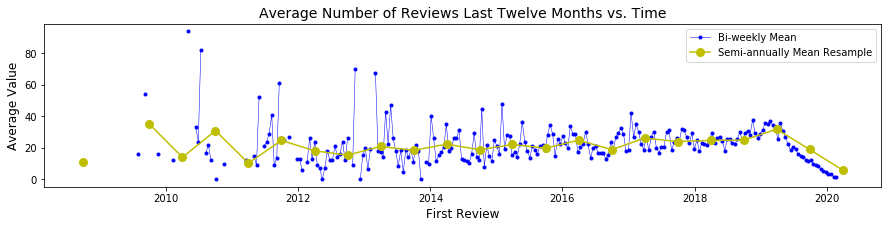

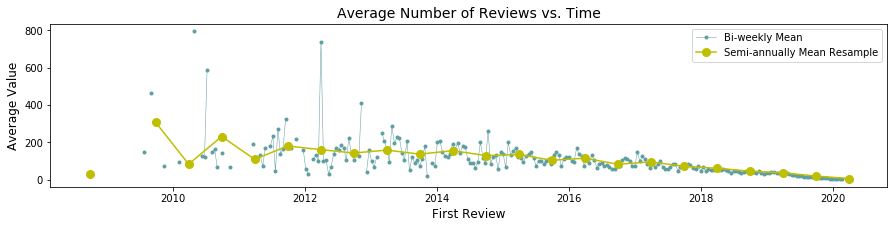

In [373]:
# Get target features
dt_first_review = listings_eda.loc[:,['first_review', 
                                      'yearly_revenue', 'occupancy_rate', 'price', 
                                      'number_of_reviews_ltm', 'number_of_reviews']].copy()
# Drop null of index
#dt_first_review = dt_first_review[dt_first_review.first_review.notnull()]   

#set index
dt_first_review.set_index(dt_first_review.first_review, inplace = True)

# Data to plot
dt_host_activeness = pd.DataFrame(dt_first_review[['yearly_revenue', 'occupancy_rate', 'price', 
                                                   'number_of_reviews_ltm', 'number_of_reviews']])

# Plot Resamplimg data
business_metrics = ['yearly_revenue', 'occupancy_rate', 'price', 'number_of_reviews_ltm', 'number_of_reviews']
color = ['gray', 'green', 'coral', 'blue', 'cadetblue']
labels = ['Yearly Revenue', 'Occupancy Rate', 'Price', 'Number of Reviews Last Twelve Months', 'Number of Reviews']

#color = ['orange', 'silver', 'pink', 'skyblue', 'burlywood']

def trend_plot(col, i):
    fig, ax = plt.subplots( figsize=(15,3))
    ax.plot(dt_host_activeness[[col]].resample('2W').mean(), marker='.', linestyle='-', linewidth=0.5, label='Bi-weekly Mean', color = color[i])
    ax.plot(dt_host_activeness[[col]].resample("6M").mean(), marker='o', markersize=8, linestyle='-', label='Semi-annually Mean Resample', color='y')
    ax.set_xlabel('First Review', fontsize = 12)
    ax.set_ylabel('Average Value', fontsize=12 )
    ax.set_title('Average ' + str(labels[i]) + ' vs. Time', fontsize=14)
    ax.legend()

for i, item in enumerate(business_metrics):
    trend_plot(item, i)
    

>> We smooth out the noise by getting the yearly resampling mean for `yearly revenue`, `price` , `occupancy rate` and `review number`.
- In general, during the decades of 2010 to 2020, there are not tremendous increase among all the business metrics. The yearly revenue, price, and occupancy rate look flat with a slightly increasing tendency.

__2. Active Time & From Last Active__
<br>
Remember that we have two calculated feature `first_review_since_host` and `last_review_month` - which indicates the ability to attract the customer and the survival ability to the latest time point.  

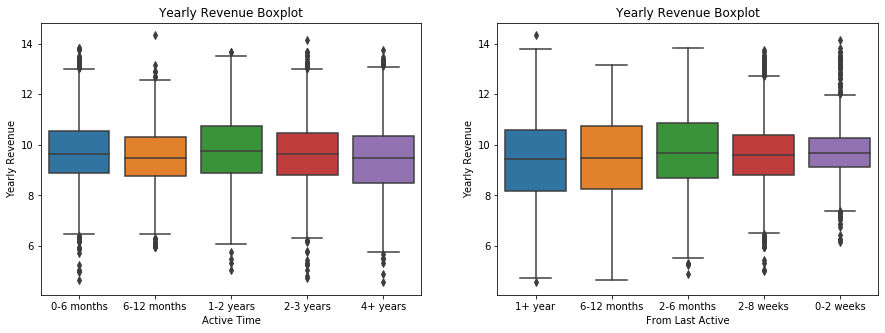

Active Time Summary:
                 count        mean          std       min        25%  \
0-6 months  1603.00000 47808.12671 103184.32392 104.54400 7254.57600   
1-2 years    981.00000 51735.71741  97991.69461 155.76000 7128.00000   
2-3 years   1743.00000 43588.98249  93840.15110 115.20000 6669.48000   
4+ years    1626.00000 34860.59134  75490.13178  96.00000 4958.64000   
6-12 months  630.00000 34332.12587  84926.30984 384.00000 6312.81600   

                    50%         75%           max  
0-6 months  15585.60000 37908.00000 1023660.00000  
1-2 years   17280.00000 46440.00000  867240.00000  
2-3 years   15552.00000 35791.20000 1391040.00000  
4+ years    13058.16000 31104.00000  913680.00000  
6-12 months 12994.32000 29979.00000 1659240.00000  

Last Active summary:
                 count        mean         std       min        25%  \
0-2 weeks   1655.00000 33775.26816 89180.60802 465.60000 9095.04000   
1+ year      998.00000 38912.89416 86602.78222  96.00000 3600.00000   

In [374]:
from numpy import median
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x="time_to_first_review", y=np.log(listings_eda['yearly_revenue']), 
            data=listings_eda, ax=axes[0], 
            order = ['0-6 months', '6-12 months', '1-2 years', '2-3 years', '4+ years'])
axes[0].set_title('Yearly Revenue Boxplot')
axes[0].set_xlabel('Active Time')
axes[0].set_ylabel('Yearly Revenue')

sns.boxplot(x="last_review_month", y=np.log(listings_eda['yearly_revenue']), 
            data=listings_eda, ax=axes[1],
            order = ['1+ year', '6-12 months', '2-6 months', '2-8 weeks', '0-2 weeks'])
axes[1].set_title('Yearly Revenue Boxplot')
axes[1].set_xlabel('From Last Active')
axes[1].set_ylabel('Yearly Revenue')
plt.show()

host_activeness = listings_eda[['time_to_first_review', 'last_review_month', 'yearly_revenue']]

active_time_summary = pd.DataFrame(group.describe().rename(columns={'yearly_revenue':name}).squeeze()for name, group in host_activeness.groupby('time_to_first_review'))
last_active_summary = pd.DataFrame(group.describe().rename(columns={'yearly_revenue':name}).squeeze()for name, group in host_activeness.groupby('last_review_month'))
print('Active Time Summary:\n{}'.format(active_time_summary))
print()
print('Last Active summary:\n{}'.format(last_active_summary))

>> __Active Time__: The created feature active_time is the months values from join to get the first review, which indicated power of attraction with shorter time. It looks like the among the groups of different months length to get the first review, the yearly revenue doesn’t change much.
<br><br/>
__From Last Active__: To embody the staying power, we created feature from_last_active, which is the length of last review to the data was scrapped time. The plots indicates that as the better staying power (get the last review as recent as it can), the higher the average yearly revenue.
<br><br/>


__3. calculated_host_listings_count__
<br>
The listing count also indicates the activities of the hosts.

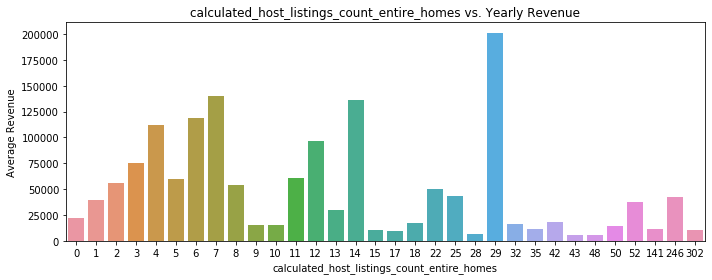

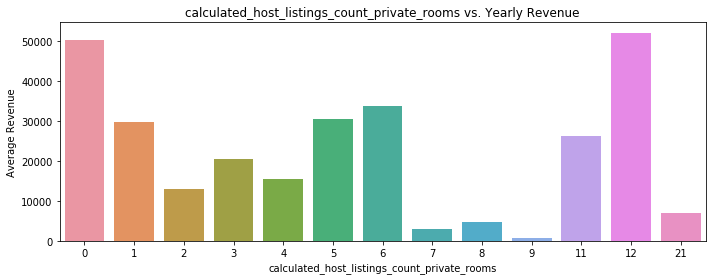

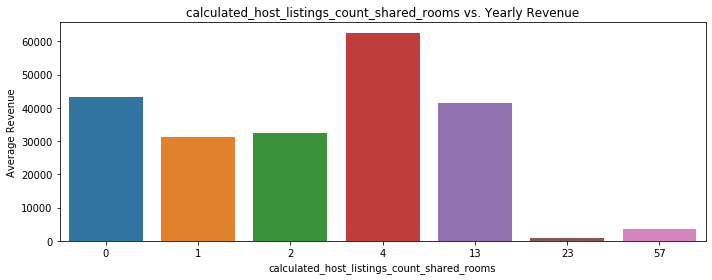

In [452]:
col = ['calculated_host_listings_count_entire_homes', 
       'calculated_host_listings_count_private_rooms', 
       'calculated_host_listings_count_shared_rooms']

def barplot_count(col):
    plt.figure(figsize = (10,4))
    listings_count_yeild = listings_eda.groupby(col)['yearly_revenue'].aggregate(np.mean).reset_index().sort_values('yearly_revenue',ascending = True)
    sns.barplot(x= col, y='yearly_revenue', data=listings_count_yeild)
    plt.ylabel(col)
    plt.ylabel('Average Revenue')
    plt.title(col + ' vs. Yearly Revenue')
    plt.tight_layout()   
    
for i in col:
    barplot_count(i)

>> We aggregate the data at the `calculated_host_listings_count` level to see if listings count affects the average yield;
- No specific pattern was detected.

__Host Active days__
<br> It appears that longer host active days suggests slightly better revenue.

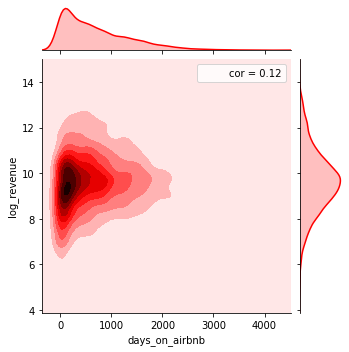

In [392]:
# log transform the revenue data for 
listings_eda["log_revenue"] = np.log(listings_eda["yearly_revenue"])

def cor(x, y):
    return stats.pearsonr(x, y)[0] 

sns.jointplot(x='days_on_airbnb', y='log_revenue', data = listings_eda, kind="kde",
                  stat_func=cor,color = 'r', height= 5)


## Host Activeness Summary

>Now we have combined both plot and the statistic summary of `yearly revenue` for host activeness on the platform:
<br>  - It looks like the platform keeps attracting more host and customers at the later stage, which indicates it's a well-managed business and it gains its popularity overall;
<br>  - The individual revenue trend are not that straightforward as we expected, we might assume there are a bunch of other underlying factors impact on the revenue;
<br>  - The hosting count suggests a moderate amount of host of management relate to better yield;
<br>  - We are heading to the next section to explore more features then;
<br>  - Longer host active days suggests slightly better revenue.

## 3.3 `Listings Accommodate & Facilities`
<a id="Laf"></a> 
<br> How does a listing's accommodate and facilities contribute to the revenue? let's take a look!

__Accommodates__

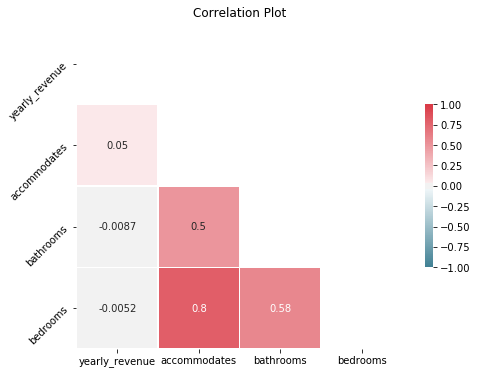

In [381]:
# set up data
acc_df = pd.DataFrame(listings_eda[['yearly_revenue', 'accommodates', 'bathrooms', 'bedrooms']])
# Compute the correlation matrix
corr = acc_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation=45) 
plt.title('Correlation Plot')
plt.show()

>> The `yearly revenue` seems to have a weak correlation with `accommodates`, `bathrooms` and `bedroom` whereas these features have a relatively high correlation with each other.

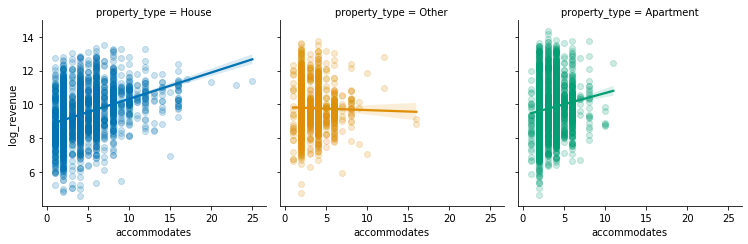

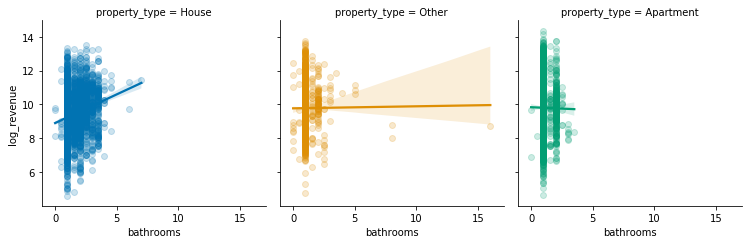

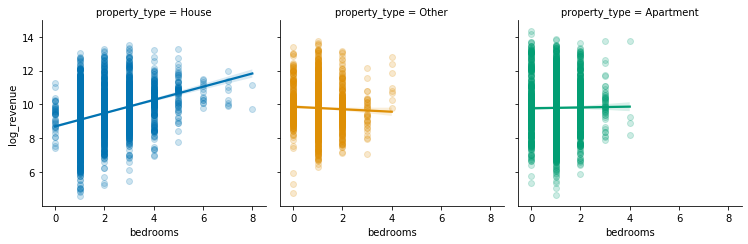

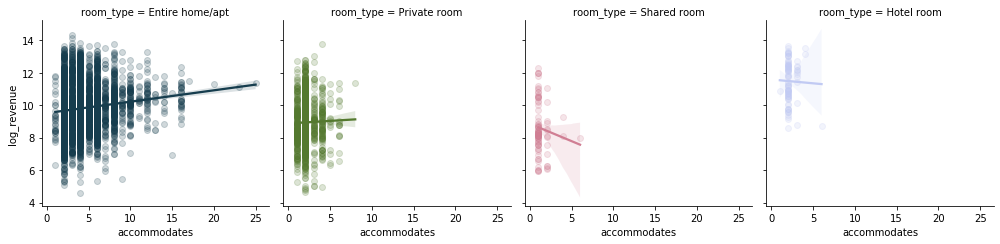

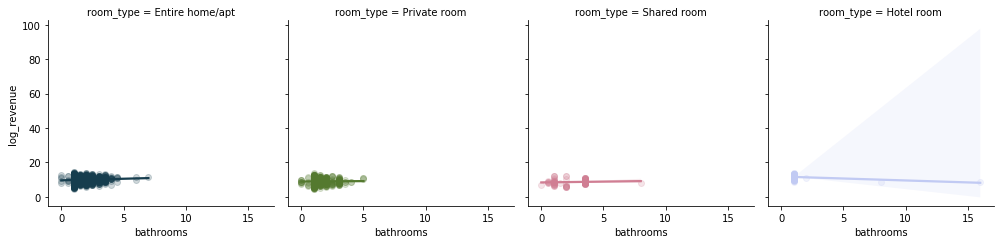

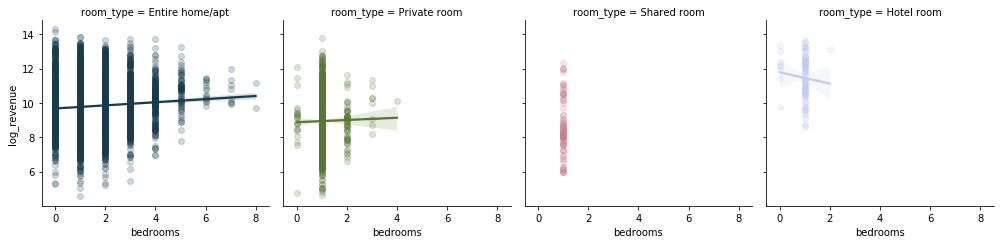

In [402]:
xcol = ['accommodates', 'bathrooms', 'bedrooms']
hues = ['property_type', 'room_type']
color = ['colorblind', 'cubehelix']

def reg_plot(x, hue):
    sns.lmplot(x=x, y='log_revenue', data=listings_eda, fit_reg=True, 
               col= hue, hue=hue, palette=color[j], 
               scatter_kws={'alpha':0.2}, height=3.5)
    
for j, group in enumerate(hues):     
    for i, item in enumerate(xcol):
        reg_plot(item, group)


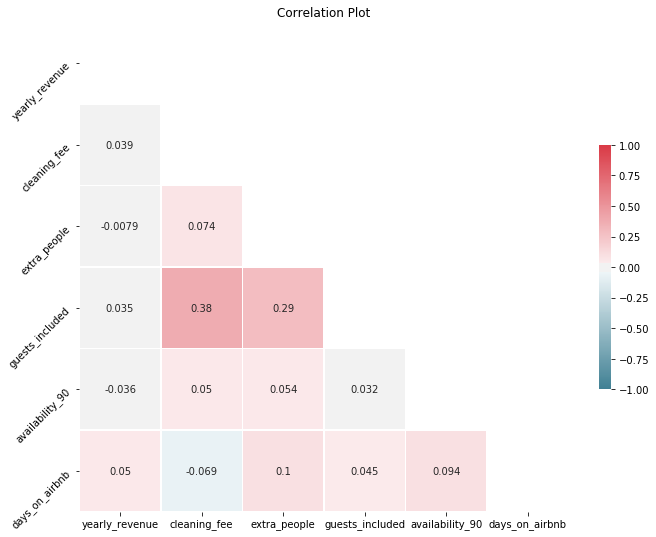

In [384]:
cor_df = pd.DataFrame(listings_eda[['yearly_revenue', 'cleaning_fee','extra_people',
                                    'guests_included','availability_90','days_on_airbnb']])

# Compute the correlation matrix
corr = cor_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation=45) 
plt.title('Correlation Plot')
plt.show()

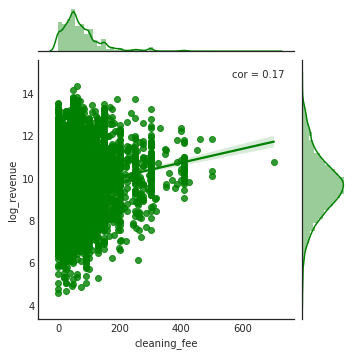

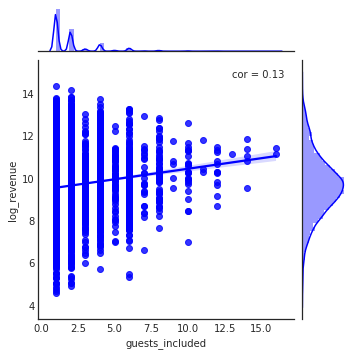

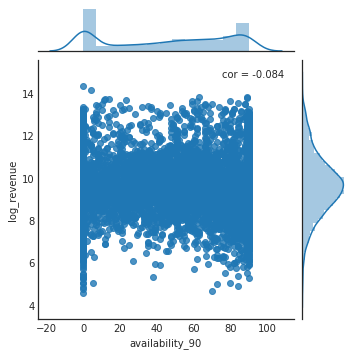

In [387]:


with plt.style.context("seaborn-white"):
    sns.jointplot(x='cleaning_fee', y='log_revenue', data = listings_eda, kind="reg", 
                  stat_func=cor, color = 'g', height= 5)

    sns.jointplot(x='guests_included', y='log_revenue', data = listings_eda, kind="reg", 
                  stat_func=cor, color = 'b', height= 5)

    sns.jointplot(x='availability_90', y='log_revenue', data = listings_eda, kind="reg", 
                  stat_func=cor, height= 5)


    

>>
-The revenue trend varies among by home type and property type.
<br>
-the cleaning_fee, guests_included, extra_people, minimum_nights and availability_90 all show weak correlations with the revenue, and for minimum_nights, the correlation is intensified by a single data point. Let's take a look at this records.

__Amenities__

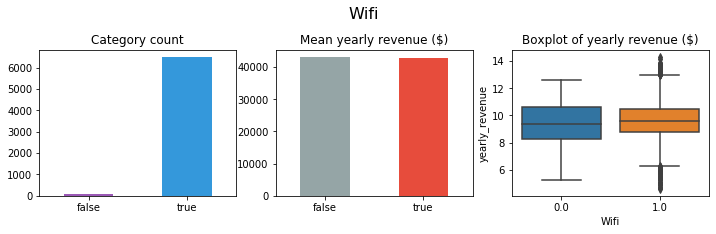

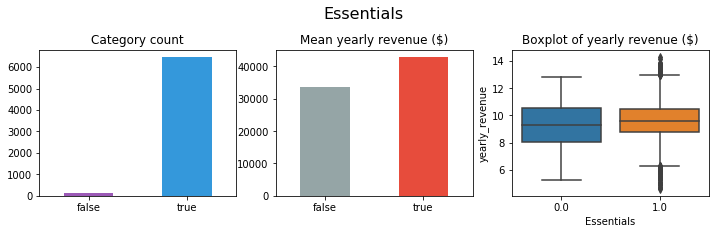

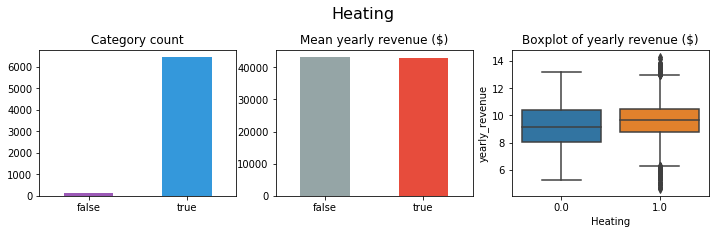

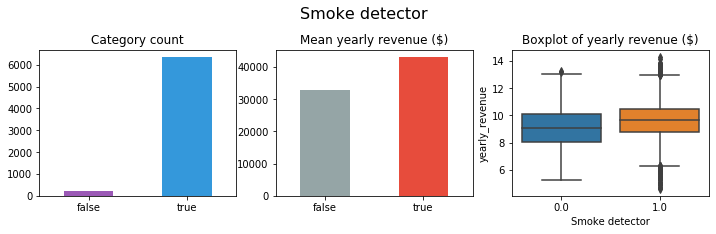

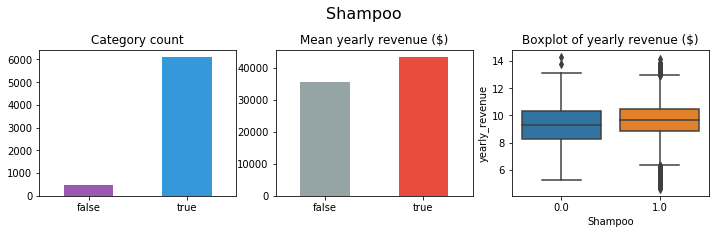

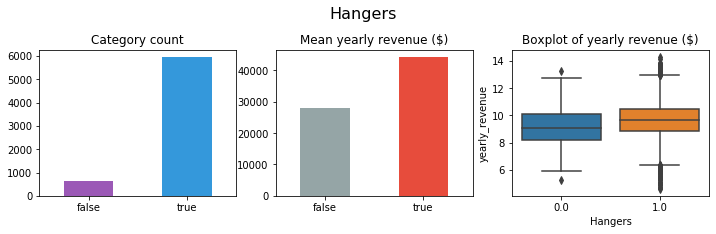

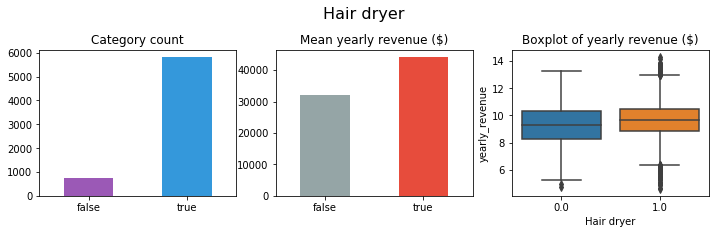

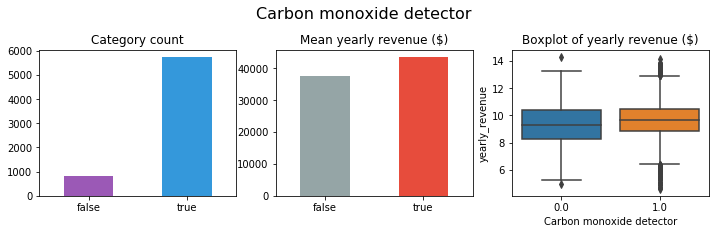

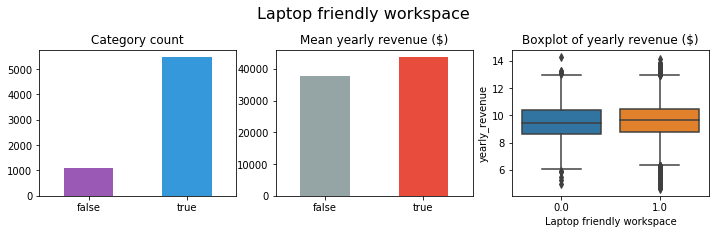

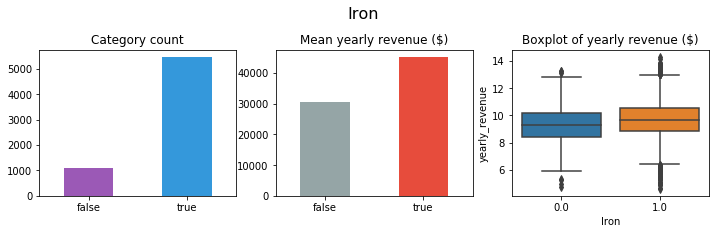

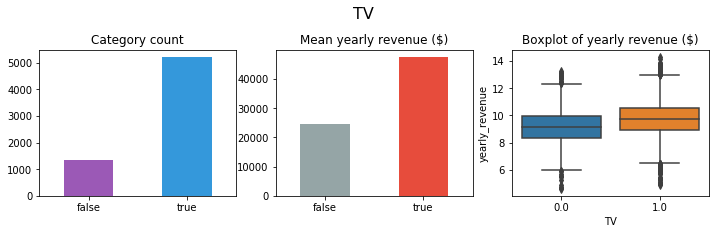

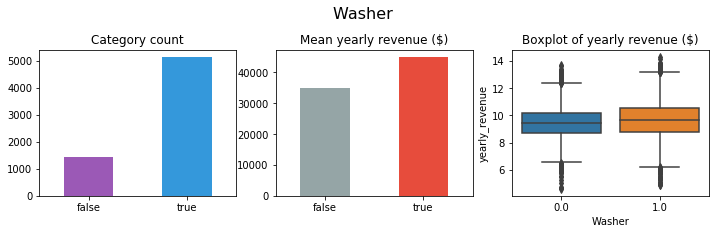

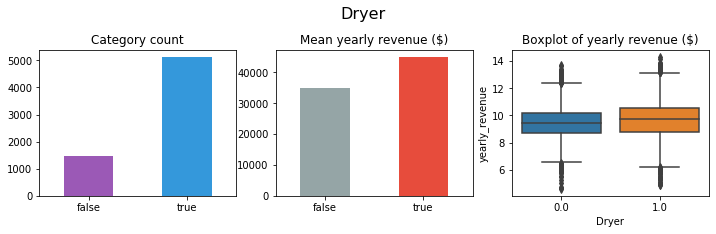

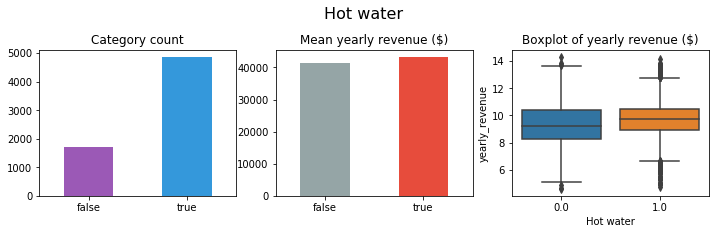

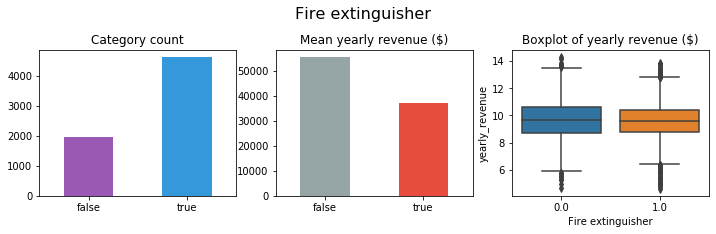

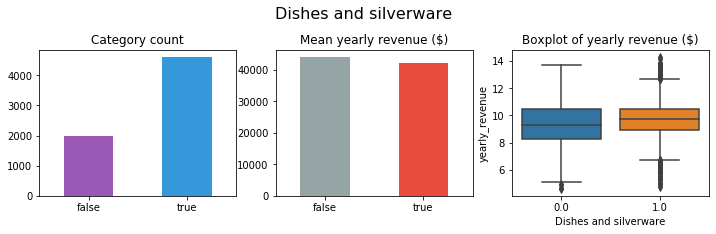

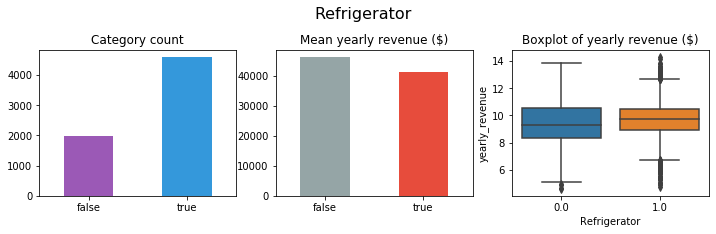

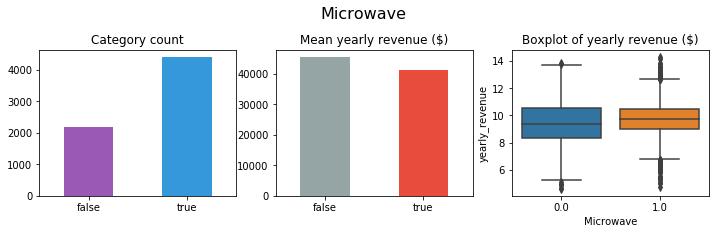

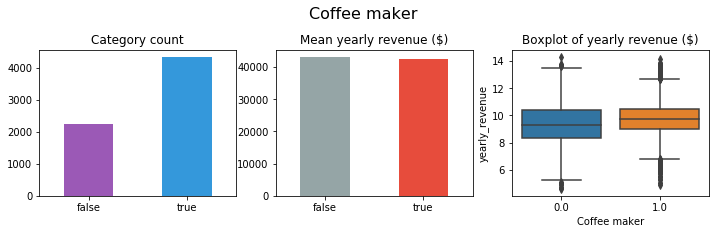

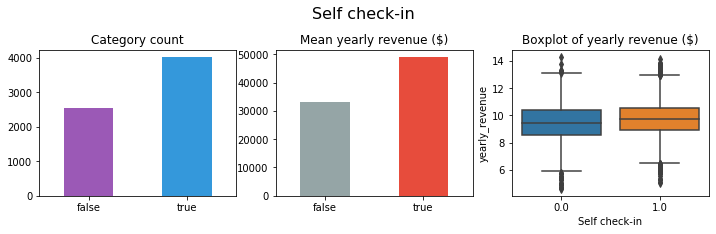

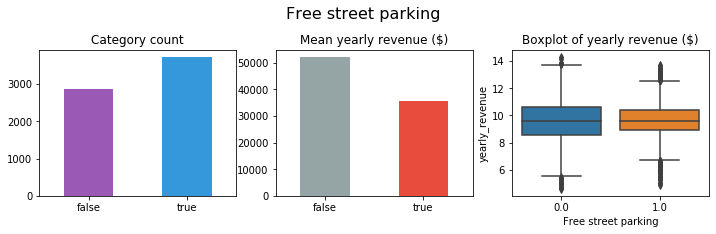

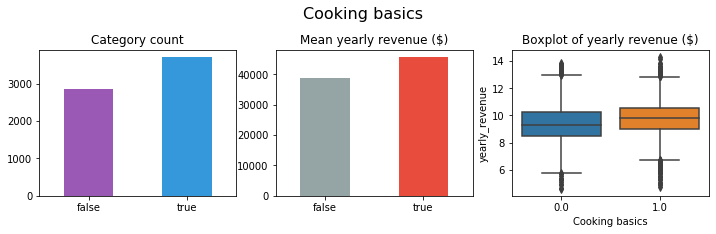

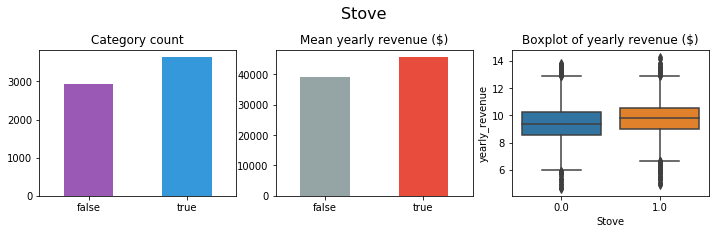

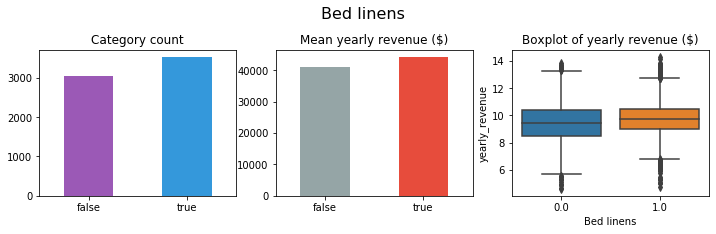

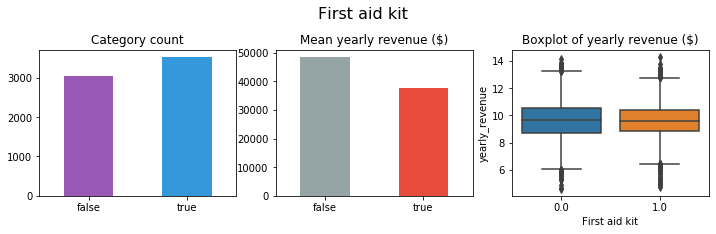

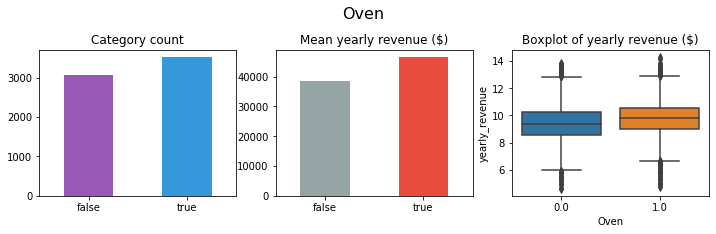

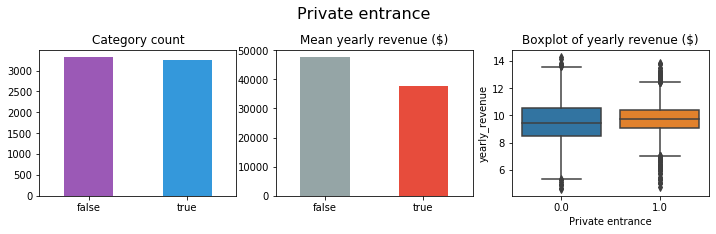

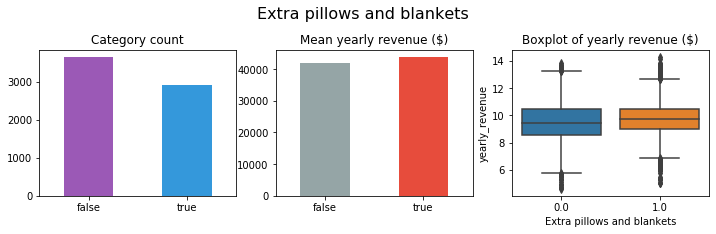

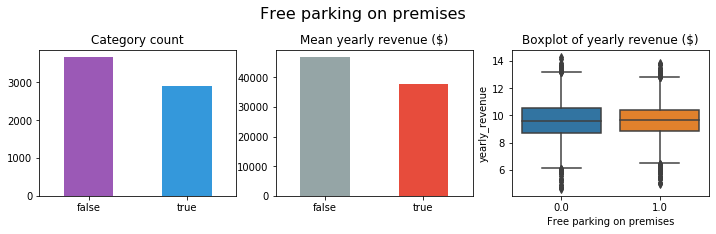

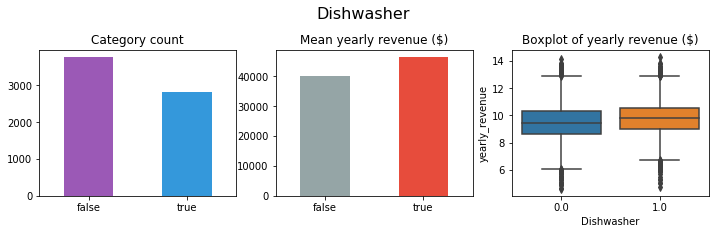

In [412]:
# define the plotting function
def binary_count_and_price_plot(col, figsize=(15,4)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    listings_eda.groupby(col).size().plot(kind='bar', ax=ax1, color=['#9b59b6', '#3498db'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    listings_eda.groupby(col)['yearly_revenue'].mean().plot(kind='bar', ax=ax2, color=['#95a5a6', '#e74c3c'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Mean yearly revenue ($)')
    ax2.set_xlabel('')
    
    sns.boxplot(x=col, y=np.log(listings_eda['yearly_revenue']), data=listings_eda,  ax=ax3)
    ax3.set_title('Boxplot of yearly revenue ($)')

    
    plt.show()

# source the target columns
cols = ['Wifi', 'Essentials',
       'Heating', 'Smoke detector', 'Shampoo', 'Hangers', 'Hair dryer',
       'Carbon monoxide detector', 'Laptop friendly workspace', 'Iron', 'TV',
       'Washer', 'Dryer', 'Hot water', 'Fire extinguisher',
       'Dishes and silverware', 'Refrigerator', 'Microwave', 'Coffee maker',
       'Self check-in', 'Free street parking', 'Cooking basics', 'Stove',
       'Bed linens', 'First aid kit', 'Oven', 'Private entrance',
       'Extra pillows and blankets', 'Free parking on premises', 'Dishwasher']

# plot the results
for col in listings_eda.loc[:,cols].columns:
    binary_count_and_price_plot(col, figsize=(12,3))   

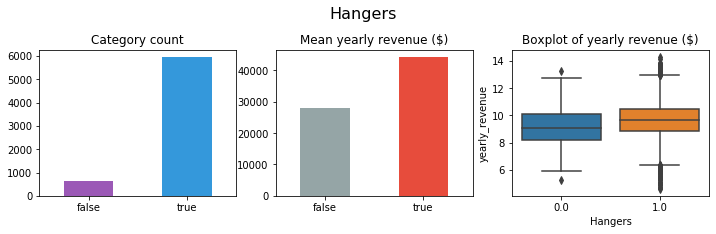

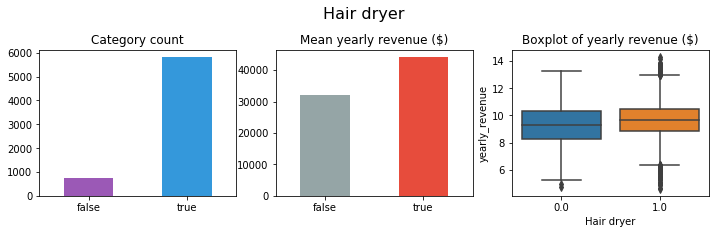

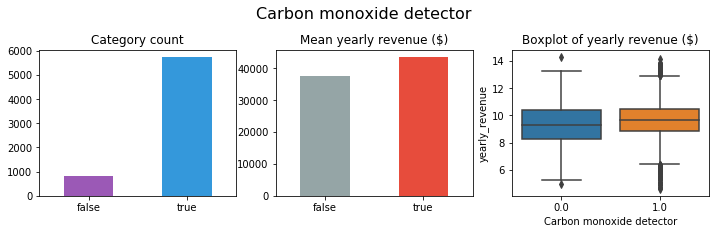

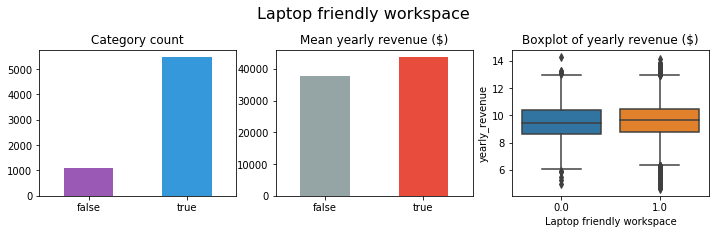

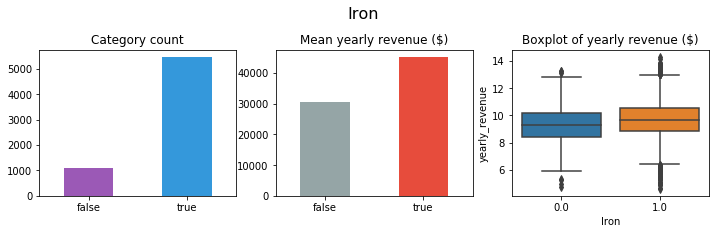

In [465]:
for col in listings_eda.loc[:,cols[5:10]].columns:
    binary_count_and_price_plot(col, figsize=(12,3))   

#### Hypothesis Testing

In [394]:
# define fucntion to draw boostrap sample
def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
    return bs_replicates

# define fucntion to bootstaps two sample test
def bootstrap_two_sample_test(df, col):
    # Compute mean of all forces: mean_force
    mean = np.mean(df['yearly_revenue'])
    data_a = df[df[col] == 1]['yearly_revenue']
    data_b = df[df[col] == 0]['yearly_revenue']
    empirical_diff_means = np.mean(data_b) - np.mean(data_a)
    # Generate shifted arrays
    a_shifted = data_a - np.mean(data_a) + mean
    b_shifted = data_b - np.mean(data_b) + mean 

    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_a = draw_bs_reps(a_shifted, np.mean, 10000)
    bs_replicates_b = draw_bs_reps(b_shifted, np.mean, 10000)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_b - bs_replicates_a 

    # Compute and print p-value: p
    p = np.sum(bs_replicates > empirical_diff_means) / len(bs_replicates)
    return p

In [476]:
# perform test
print("Bootstrap hypothesis test for difference of means yearly revenue: \n")
for col in cols:
    p = bootstrap_two_sample_test(listings_eda, col)
    print("Hypothesis Test of {:26}|".format(col), "p-value = {}".format(p))

Bootstrap hypothesis test for difference of means yearly revenue: 

Hypothesis Test of Wifi                      | p-value = 0.4641
Hypothesis Test of Essentials                | p-value = 0.9673
Hypothesis Test of Heating                   | p-value = 0.4547
Hypothesis Test of Smoke detector            | p-value = 0.9892
Hypothesis Test of Shampoo                   | p-value = 0.9614
Hypothesis Test of Hangers                   | p-value = 1.0
Hypothesis Test of Hair dryer                | p-value = 1.0
Hypothesis Test of Carbon monoxide detector  | p-value = 0.9708
Hypothesis Test of Laptop friendly workspace | p-value = 0.9898
Hypothesis Test of Iron                      | p-value = 1.0
Hypothesis Test of TV                        | p-value = 1.0
Hypothesis Test of Washer                    | p-value = 1.0
Hypothesis Test of Dryer                     | p-value = 1.0
Hypothesis Test of Hot water                 | p-value = 0.7468
Hypothesis Test of Fire extinguisher         | p-value

>> In general, we expect the amenities can lead to better yield! Actually, not every single item contributes to a higher average yield when it is available.
<br> - With wifi, heating, smoke detector, essentials, and gym, etc., the listing can make more money,
<br> - The washer, pets allowed listings have the similar yield with those don't have that;
<br> - And the pet living in the properties seems to be a negative factor for customers to choose the listing to stay.
<br> - The hypothesis testing results show there's an only statistically significant difference in mean yield for the `Fire extinguisher`, `Free street parking`, `First aid kit`, `Free parking on premises`, `Private entrance` or not.

## Listing Accommodate & Facilities Summary

>Now we have explored how Listing Accommodate & Facilities can influence the `yearly revenue`:
<br>  - In general, the better commodious can bring in better revenue;
<br>  - The cleaning_fee, extra_people, minimum_nights and availability show weak correlations with the revenue;
<br>  - Five amenities contribute to a lower average revenue.

## 3.4 `Interavtive Relationshiop`
<a id="Ir"></a> 
<br> Can the interaction between the hosts and customers influence the yield? let's exam from both hosts' and customers' perspectives.

### 3.4.1 From Hosts' Side

__1. host response__

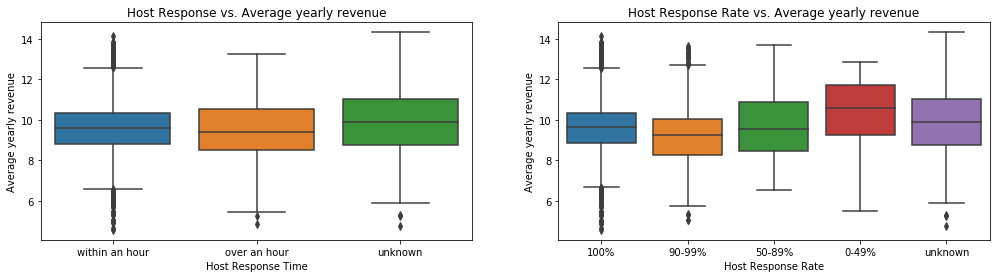

host response time summary
                    count        mean         std       min        25%  \
over an hour    790.00000 39559.67335 69210.48750 126.00000 4910.40000   
unknown        1255.00000 54654.68349 94987.50933 115.20000 6480.00000   
within an hour 4538.00000 40069.09507 94549.48715  96.00000 6804.00000   

                       50%         75%           max  
over an hour   11968.80000 37562.40000  578880.00000  
unknown        19641.60000 61966.80000 1659240.00000  
within an hour 14715.60000 30516.89400 1391040.00000  

host response rate summary
             count        mean          std       min         25%         50%  \
0-49%     53.00000 75461.36785  89260.74279 244.80000 10224.00000 38880.00000   
100%    4143.00000 39219.22595  88957.64393  96.00000  7142.40000 15329.16000   
50-89%   280.00000 52735.76066 107620.32379 676.80000  4668.40800 14329.20000   
90-99%   852.00000 37364.99625  95705.41211 155.76000  3962.97000 10416.12000   
unknown 1255.00000 5465

In [478]:
# plot the yield
f, axes = plt.subplots(1, 2, figsize=(17,4))
sns.boxplot(x="host_response_time", y=np.log(listings_eda['yearly_revenue']), 
            data=listings_eda,  ax=axes[0], 
            order = ['within an hour', 'over an hour', 'unknown'])
axes[0].set_title('Host Response vs. Average yearly revenue')
axes[0].set_xlabel('Host Response Time')
axes[0].set_ylabel('Average yearly revenue')

sns.boxplot(x="host_response_rate", y=np.log(listings_eda['yearly_revenue']), 
            data=listings_eda,  ax=axes[1],
            order = ['100%', '90-99%', '50-89%', '0-49%', 'unknown'])
axes[1].set_title('Host Response Rate vs. Average yearly revenue')
axes[1].set_xlabel('Host Response Rate')
axes[1].set_ylabel('Average yearly revenue')
plt.show()

host_response = listings_eda[['host_response_time', 'host_response_rate', 'yearly_revenue']]
host_response_time_summary = pd.DataFrame(group.describe().rename(columns={'yearly_revenue':name}).squeeze()for name, group in host_response.groupby('host_response_time'))
host_response_rate_summary = pd.DataFrame(group.describe().rename(columns={'yearly_revenue':name}).squeeze()for name, group in host_response.groupby('host_response_rate'))
print("host response time summary\n{}".format(host_response_time_summary))
print()
print("host response rate summary\n{}".format(host_response_rate_summary))

>> The plot indicates the host response might not have improved the revenue.
<br> - No trend indicating the faster the hosts get back to the customer, the more money they can make!
<br> - No trend of the higher response rate also suggests the positive results!

__2. Cancellation Policy__

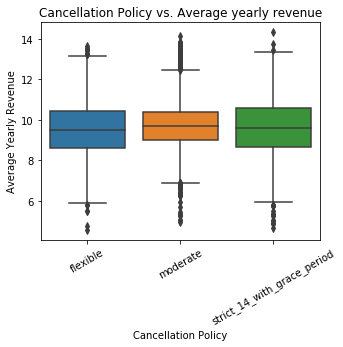

In [423]:
plt.figure(figsize=(5,4))

sns.boxplot(x="cancellation_policy", y=np.log(listings_eda['yearly_revenue']), data=listings_eda,
            order = ['flexible', 'moderate', 'strict_14_with_grace_period'])
plt.title('Cancellation Policy vs. Average yearly revenue')
plt.xlabel('Cancellation Policy')
plt.xticks(plt.xticks()[0], rotation=30)
plt.ylabel('Average Yearly Revenue')
plt.show()


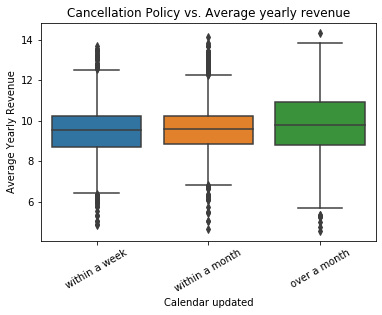

In [421]:

sns.boxplot(x="calendar_updated", y=np.log(listings_eda['yearly_revenue']), data=listings_eda,
            order = ['within a week', 'within a month', 'over a month'])
plt.title('Cancellation Policy vs. Average yearly revenue')
plt.xlabel('Calendar updated')
plt.xticks(plt.xticks()[0], rotation=30)
plt.ylabel('Average Yearly Revenue')

plt.show()

>> It seems flexible cancellation does not guarantee better gain, neither does the frequent calender updates.

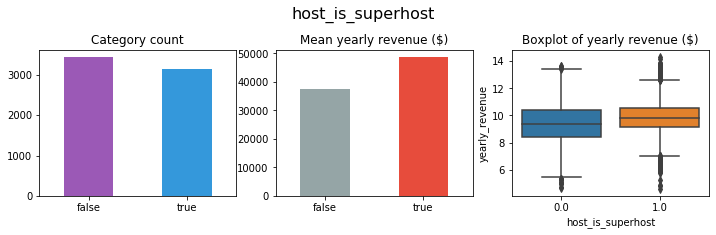

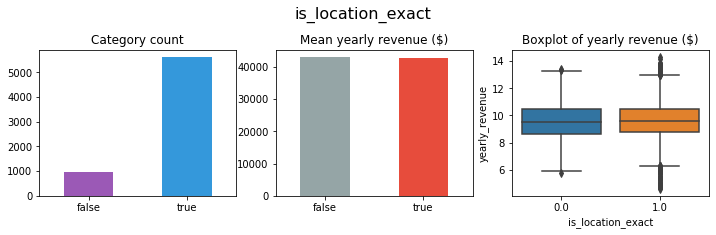

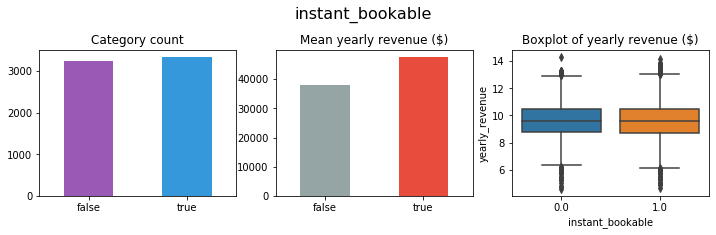

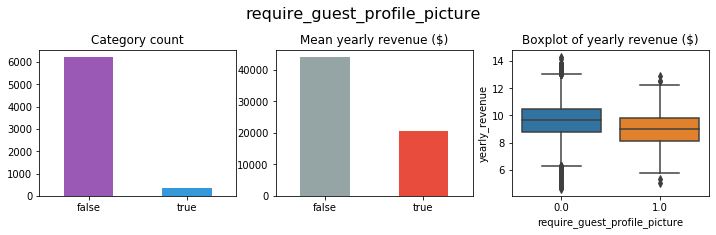

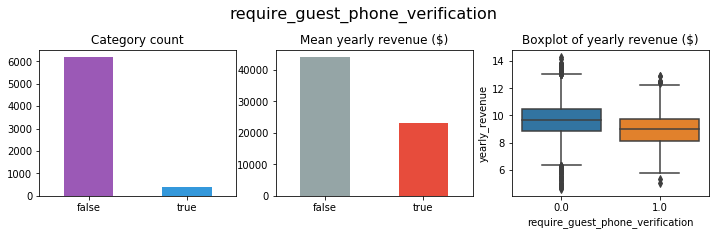

In [424]:
# plot the results
cols_h = ['host_is_superhost', 'is_location_exact','instant_bookable', 
          'require_guest_profile_picture', 'require_guest_phone_verification']
for col in listings_eda.loc[:,cols_h].columns:
    binary_count_and_price_plot(col, figsize=(12,3))

##### Hypothesis Testing 

In [480]:
# perform test
print("Bootstrap hypothesis test for difference of means yearly revenue: \n")
for col in cols_h:
    p = bootstrap_two_sample_test(listings_eda, col)
    #print(col, "p-value = {}".format(p))
    print("Hypothesis Test of {:32}|".format(col), "p-value = {}".format(p))

Bootstrap hypothesis test for difference of means yearly revenue: 

Hypothesis Test of host_is_superhost               | p-value = 1.0
Hypothesis Test of is_location_exact               | p-value = 0.4659
Hypothesis Test of instant_bookable                | p-value = 1.0
Hypothesis Test of require_guest_profile_picture   | p-value = 0.0
Hypothesis Test of require_guest_phone_verification| p-value = 0.0


>> Further, 
<br> - The super hosts, the hosts have a picture and if they have their identifies, they lose more customers and earn less money.
<br> - The same results applied to `require_guest_phone_verification` as well.

### 3.4.2 From Customers' Side

__Review Score__

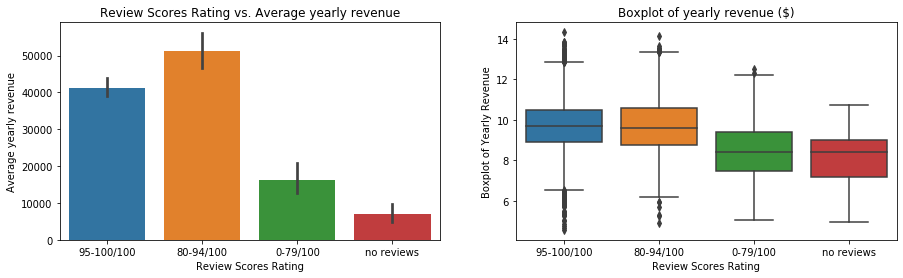

In [427]:
# Plot the review_scores_rating with score 0-100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))

sns.barplot(x="review_scores_rating", y="yearly_revenue", data=listings_eda, estimator=np.mean, ax=ax1,
            order = ['95-100/100', '80-94/100', '0-79/100', 'no reviews'])
ax1.set_title('Review Scores Rating vs. Average yearly revenue')
ax1.set_xlabel('Review Scores Rating')
ax1.set_ylabel('Average yearly revenue')

sns.boxplot(x="review_scores_rating", y=np.log(listings_eda['yearly_revenue']), data=listings_eda,  ax=ax2,
           order = ['95-100/100', '80-94/100', '0-79/100', 'no reviews'])
ax2.set_title('Boxplot of yearly revenue ($)')
ax2.set_xlabel('Review Scores Rating')
ax2.set_ylabel('Boxplot of Yearly Revenue')
plt.show()

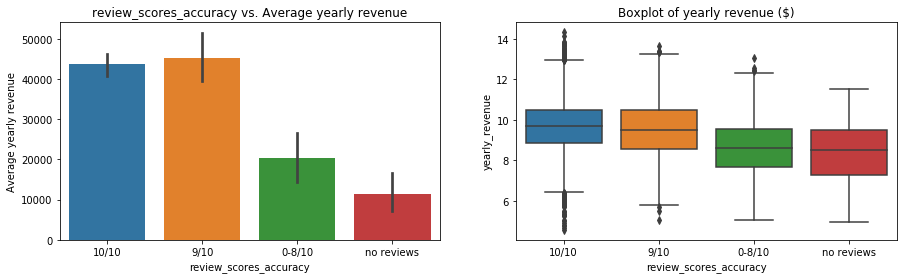

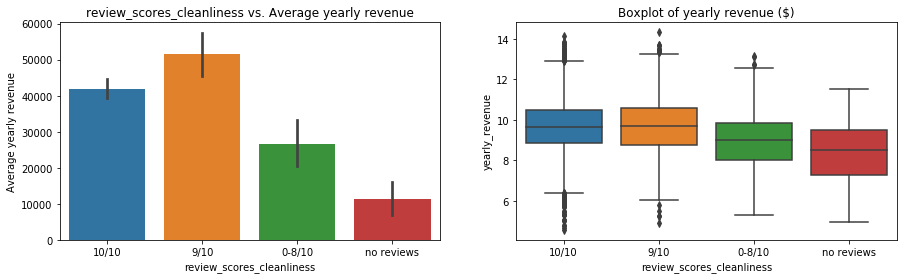

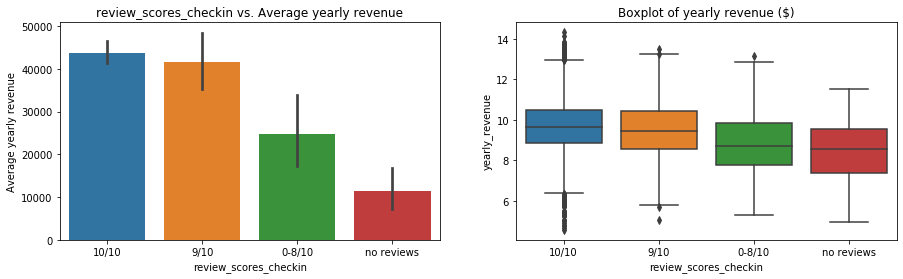

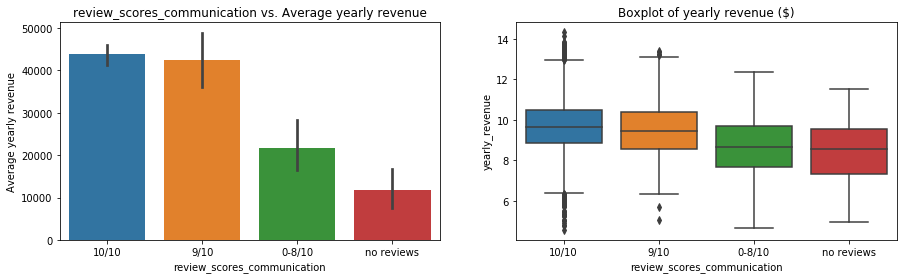

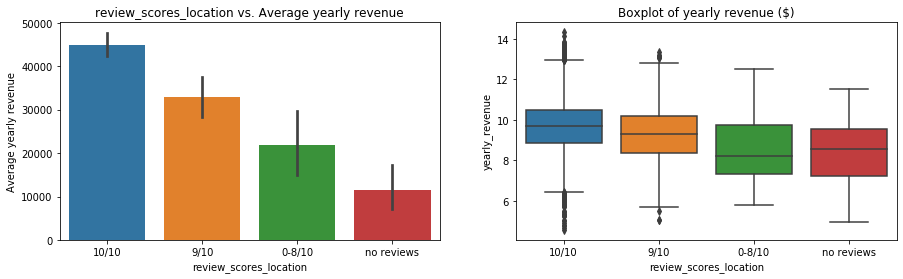

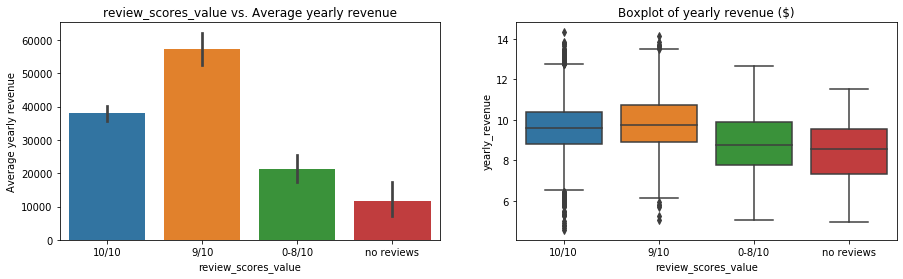

In [429]:
# creat list for group score with 0-10
score_col = ['review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']

# plot the results
for col in score_col:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4)) 
    sns.barplot(x=listings_eda[col], y="yearly_revenue", data=listings_eda, estimator=np.mean, ax= ax1,
                order = ['10/10', '9/10', '0-8/10', 'no reviews'])
    ax1.set_title( col + ' vs. Average yearly revenue')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Average yearly revenue')
    
    sns.boxplot(x=col, y=np.log(listings_eda['yearly_revenue']), data=listings_eda, ax=ax2, 
    order = ['10/10', '9/10', '0-8/10', 'no reviews'])
    ax2.set_title('Boxplot of yearly revenue ($)')
                                   
                                   
    plt.show()
                                

>> Unsurprisingly, all the review score shows the pattern that higher rating suggests better yield.

## Interavtive Relationshiop Summary

>In general, The interavtive relationshiop between hosts and customers suggest a positive improvement towards yield.
<br> - The more response the hosts do, they can obtain better gain;
<br> - The customers leavs better rating also promte that too.   

## 3.5 `Geographical Information`
<a id="Gi"></a> 
<br> Geographical location is a very important factor both for managing a listing and choosing a place to stay! We are excited about to see how that'll work!

In [430]:
def generateBaseMap(default_location=[47.623601, -122.328874], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

#### Geographical Pattern for Average Yearly Average

In [431]:
# Heatmap for yield grouped by geographical location
base_map_yield = generateBaseMap()
HeatMap(data=listings_eda[['latitude', 'longitude', 'yearly_revenue']].groupby(['latitude', 'longitude']).median().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_yield)
base_map_yield

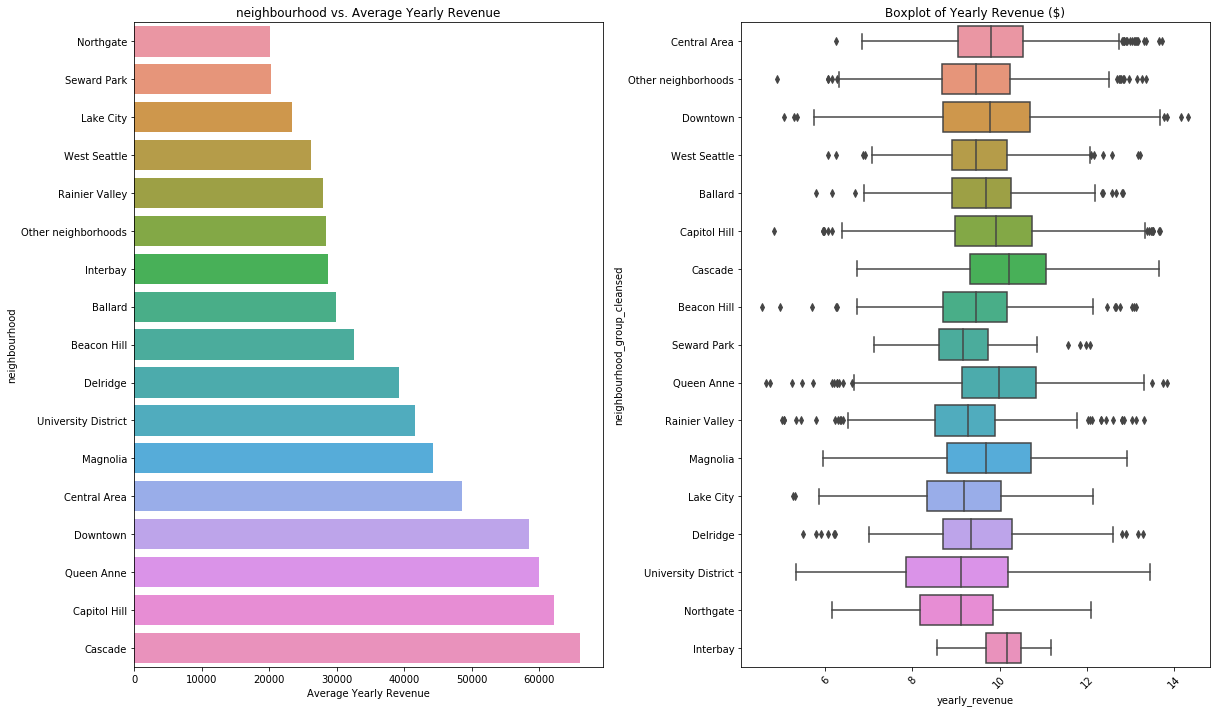

In [449]:
listings_neigh = listings_eda.groupby('neighbourhood_group_cleansed')['yearly_revenue'].aggregate(np.mean).reset_index().sort_values('yearly_revenue',ascending = True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,10))
plt.xticks(rotation=45) 

sns.barplot(y="neighbourhood_group_cleansed", x="yearly_revenue", data=listings_neigh, estimator=np.mean, ci = 'sd', ax=ax1)
ax1.set_title('neighbourhood vs. Average Yearly Revenue')
ax1.set_ylabel('neighbourhood')
ax1.set_xlabel('Average Yearly Revenue')

sns.boxplot(y="neighbourhood_group_cleansed", x=np.log(listings_eda['yearly_revenue']),  
         data= listings_eda,  ax=ax2)
ax2.set_title('Boxplot of Yearly Revenue ($)')

#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=65)
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [433]:
neighbourhood = listings_eda[['neighbourhood_group_cleansed', 'yearly_revenue']]
neighbourhood_summary = pd.DataFrame(group.describe().rename(columns={'yearly_revenue':name}).squeeze()for name, group in neighbourhood.groupby('neighbourhood_group_cleansed'))
print("neighbourhood summary\n{}".format(neighbourhood_summary.iloc[:,[0,1,2]]))

neighbourhood summary
                         count        mean          std
Ballard              364.00000 29943.71308  47803.85036
Beacon Hill          264.00000 32554.21764  67001.30203
Capitol Hill         677.00000 62147.54088 123920.47686
Cascade              242.00000 66057.33570 105379.78422
Central Area         598.00000 48554.11649  98203.31143
Delridge             207.00000 39174.39699  80730.47156
Downtown            1026.00000 58426.93476 130397.57903
Interbay              27.00000 28748.80889  16275.44349
Lake City            115.00000 23423.86581  35686.54793
Magnolia             135.00000 44303.24480  72630.89942
Northgate            163.00000 20180.04825  30775.58518
Other neighborhoods 1265.00000 28434.37626  51527.86109
Queen Anne           464.00000 59919.64055 111407.36929
Rainier Valley       372.00000 27933.99658  65299.46705
Seward Park           62.00000 20345.40387  34778.45661
University District  199.00000 41662.50030 101103.80434
West Seattle         403.0

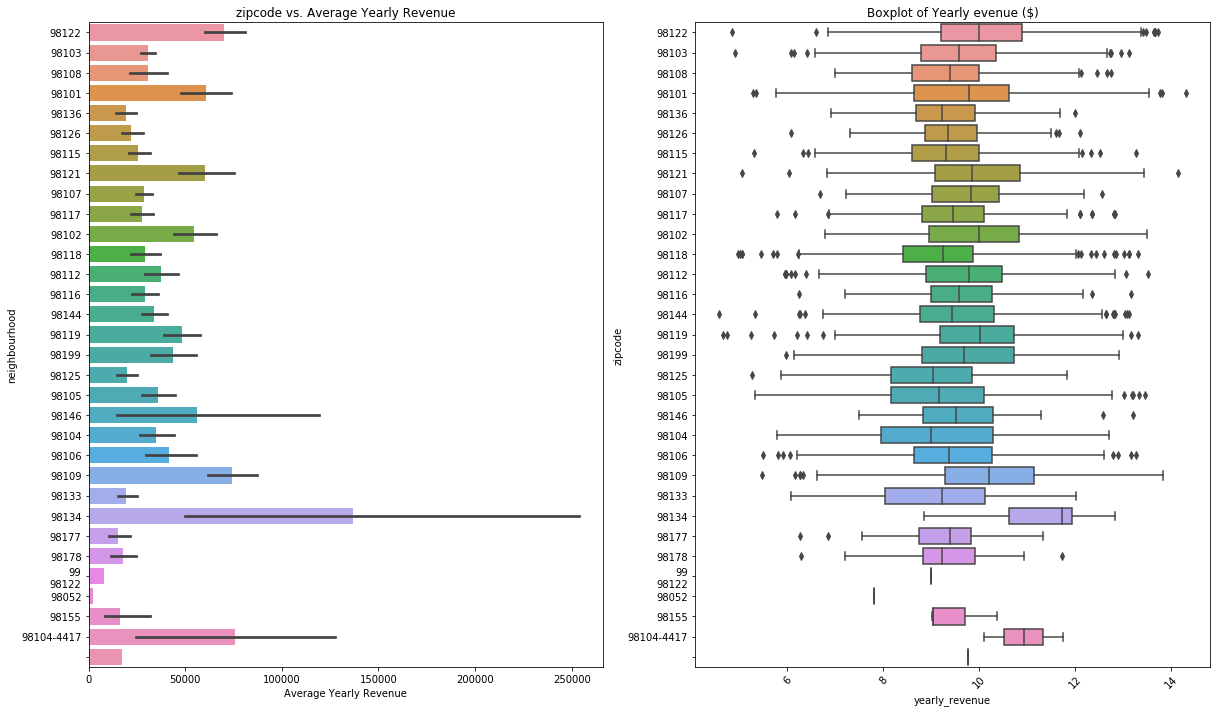

In [463]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,10))
plt.xticks(rotation=45) 

sns.barplot(y="zipcode", x="yearly_revenue", data=listings_eda, estimator=np.mean, ax=ax1)
ax1.set_title('zipcode vs. Average Yearly Revenue')
ax1.set_ylabel('neighbourhood')
ax1.set_xlabel('Average Yearly Revenue')

sns.boxplot(y="zipcode", x=np.log(listings_eda['yearly_revenue']), data=listings_eda,  ax=ax2)
ax2.set_title('Boxplot of Yearly evenue ($)')

#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=65)
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()

## Geographical Information Summary

>The average yield that grouped by neighborhood indicate the central area - downtown, Queen Anne and Ballard obtain the best yield among other areas, whereas the university district and lake city have the least - which make sense, the central area is closer to the mall, bar and any entertainment and bring in the better yields.
<br>

## 4. Summary 
<a id = "sum"></a>
We are done with our exploratory data analysis, and we will wrap up the exploratory data analysis and data storytelling by writing a cleaned data as final dataset for modeling, which will be used for the data modeling as nest step. 

In [437]:
# Define a drop function for repeatitive use
def drop(data, feat):
    """
    drop feature from data
    """
    new_data = data.drop(feat, axis=1)
    print('Dropping {}...'.format(feat))
    return new_data


## Drop Freatured kept for EDA
EDA_drop = ['host_id', 'host_since', 'zipcode', 'latitude', 'longitude', 
            'minimum_nights_avg_ntm', 'number_of_reviews', 'reviews_per_month',
            'occupancy_rate', 'first_review', 'last_review', 'price', 'log_revenue']

for feat in listings_eda.columns:
    if feat in EDA_drop:
        listings_eda = drop(listings_eda, feat)

## Write the cleaned data
listings_eda.to_csv("listings_clean_model.csv", index=False)

Dropping host_id...
Dropping host_since...
Dropping zipcode...
Dropping latitude...
Dropping longitude...
Dropping price...
Dropping minimum_nights_avg_ntm...
Dropping number_of_reviews...
Dropping first_review...
Dropping last_review...
Dropping reviews_per_month...
Dropping occupancy_rate...
Dropping log_revenue...
